# Sensors, Perception and Actuation
## Assignment - 1

### Github Link: https://github.com/syedjameel/SPA-Assignment-1.git

Student : Jameel Ahmed Syed
email : j.syed@innopolis.university

### Task 1
To Check Central Limit Theorem
- building two-modal distribution (like above) generating many points,
- taking samples (e.g. 100 values) and computing mean value,
- plotting distribution with mean values from many samples

### Task 2
To fit a Polynomial Regression on noisy data
- generating noisy data points (with nonlinear relationship, i.e. mix a model points + noise points),
- using least square regression or pseudoinverse or optimize.curve_fit methods (on your choice)
```
Contents
1. Import All the Necessary Libraries
2. Assignment 1.1 : Check the Central Limit Theorem
3. Assignment 1.2 : Polynomial regression

<hr>

#### 1. Import All the Necessary Libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

<hr>

#### Assignment 1.1: Check the Central Limit Theorem

In [7]:
def distri_sample_mean(x, sample_size, num_sample):
    """To compute mean of multiple samples in a population distribution"""
    distri_means = []
    for i in range(num_sample):
        sample = np.random.choice(x, size=10, replace=False)
        distri_means.append(np.mean(sample))
    return distri_means

/home/syed/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/syed/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


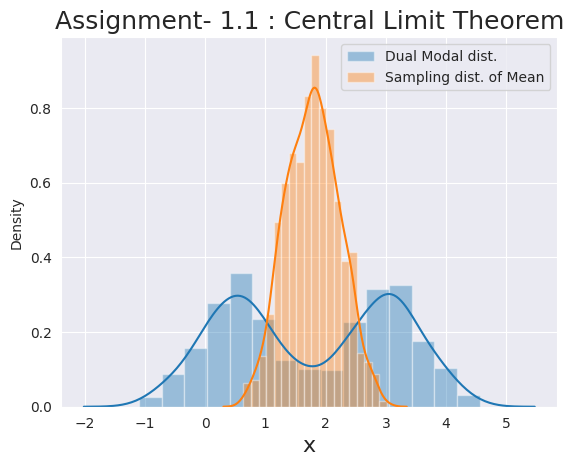

In [8]:
meu1 = 0.5
sigma1 = 0.6
meu2 = 3
sigma2 = 0.6

x1 = np.random.normal(meu1, sigma1, 1000)
x2 = np.random.normal(meu2, sigma2, 1000)
x = np.concatenate((x1, x2))

sns.distplot(x, label="Dual Modal dist.")
sns.distplot(distri_sample_mean(x, sample_size=100, num_sample=1000),
             label="Sampling dist. of Mean")
plt.legend()
plt.title("Assignment- 1.1 : Central Limit Theorem", fontsize=18)
plt.xlabel("x", fontsize=16)
plt.show()

<hr>

#### Assignment 1.2: Polynomial regression

a: 2.9599521650278042, b: 5.734518412440027, c: -11.11295183331456, d: -23.513860586560913


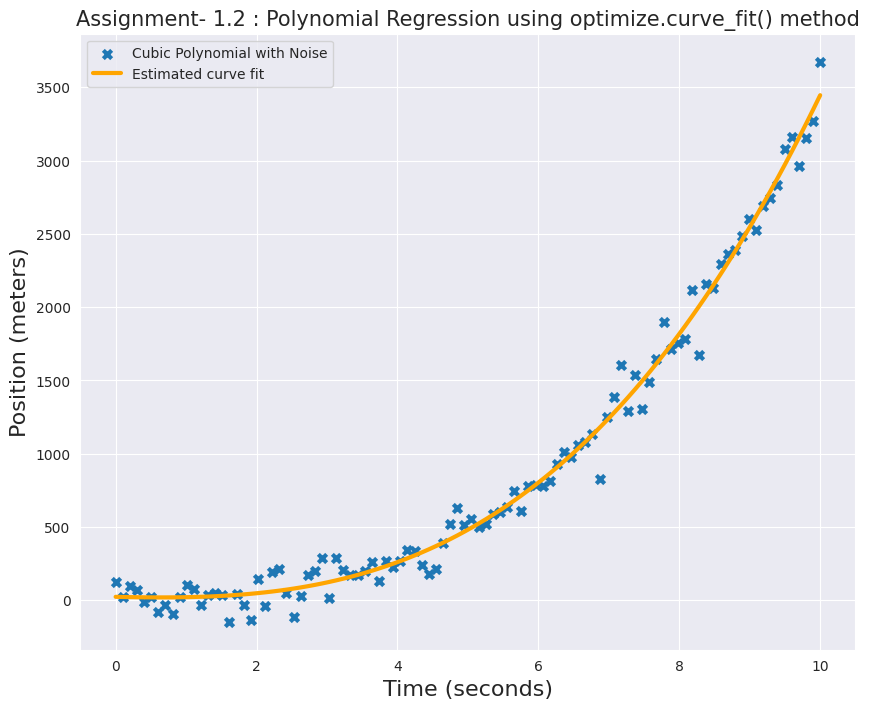

In [9]:
# Polynomial regression
a = 3
b = 4
c = 7
d = 2
# ax^3 + bx^2 + cx + d = 0 (CUBIC polynomial)

# The true function for the Nonlinear curve
def func(t, a, b, c, d):
    y = a * (t ** 3) + b * (t ** 2) + c * t - d
    return y

t = np.linspace(0, 10, num=100)

# True function + the random noise
y = y = func(t, a, b, c, d) + 100 * np.random.randn(100)


# Optimal fit using optimize.curve_fit() from scipy library
alpha = optimize.curve_fit(func, xdata = t, ydata = y)[0]
print(f"a: {alpha[0]}, b: {alpha[1]}, c: {alpha[2]}, d: {alpha[3]}")

y_fit = func(t, alpha[0], alpha[1], alpha[2], alpha[3])

# plotting the data
plt.figure(figsize = (10,8))
plt.title("Assignment- 1.2 : Polynomial Regression using optimize.curve_fit() method", fontsize=15)
plt.scatter(t, y, marker="x", linewidths=3, label="Cubic Polynomial with Noise")
plt.plot(t, y_fit, color='orange', linewidth=3, label="Estimated curve fit")
plt.xlabel("Time (seconds)", fontsize=16)
plt.ylabel("Position (meters)", fontsize=16)
plt.legend()
plt.show()